In [1]:
# Default libraries: pandas, numpy
# import beakerx
import cProfile
import datetime
# import feather
import math
import os
import pickle
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import urbangrammar_graphics as ugg

from IPython.display import Markdown as md
from collections import Counter
from clustergram import Clustergram
from datetime import datetime
from itertools import groupby

from pandas_profiling import ProfileReport

from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, BaggingClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, GridSearchCV, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from library.sb_utils import save_file

pd.options.display.float_format = "{:.2f}".format
# plt.rcParams.update({'font.size': 18})

<h1>Table of Contents<span class="tocSkip"></span></h1><a id='0'></a>
<!-- <font size="5"> **Questions:** </font>  -->

* [1 Introduction](#1-Introduction)
    * [1.1 Data source](#1.1-Data-source)
    * [1.2 Stakeholders](#1.2-Stakeholders)
    * [1.3 Water Quality](#1.3-Water-Quality)
* [2 EDA (Exploratory Data Analysis)](#2-EDA-(Exploratory-Data-Analysis))
    * [2.1 Objectives](#2.1-Objectives)
    * [2.2 Load Data](#2.2-Load-Data)
    * [2.3 Missing Values](#2.3-Missing-Values)
    * [2.4 Numeric Data](#2.4-Numeric-Data)
        * [2.4.1 Distributions](#2.4.1-Distributions)
        * [2.4.2 Boxplots and Statistical summary grouped by potability](#2.4.3-Boxplots-and-Statistical-summary-grouped-by-potability)
        * [2.4.3 Scatterplots of numeric features against Potability](#2.4.4-Scatterplots-of-numeric-features-against-Potability)
        * [2.4.4 Correlation heatmap](#2.4.5-Correlation-heatmap)
        * [2.4.5 Classification: measured vs. expected](#2.4.2-Classification:-measured-vs.-expected)
        * [2.4.6 Considerations](#2.4.6-Considerations)
    * [2.5 Principle components analysis (PCA)](#2.5-Principle-components-analysis (PCA))
        * [2.5.1 Scale the data](#2.5.1-Scale-the-data)
        * [2.5.2 PCA transformation](#2.5.2-PCA-transformation)
    * [2.6 EDA Conclusions](#2.6-EDA-Conclusions)
* [3 Modeling](#3-Modeling)
    * [3.1 Data treatment](#3.1-Data-treatment)
        * [3.1.1 Missing values](#3.1.1-Missing-values)
        * [3.1.2 Scaling](#3.1.2-Scaling)
        * [3.1.3 Train/Test sets](#3.1.3-Train/Test-sets)
    * [3.2 Classifiers](#3.2-Classifiers)
        * [3.2.1 Declaration](#3.2.1-Declaration)
        * [3.2.2 Parameters](#3.2.2-Parameters)
        * [3.2.3 Grid](#3.2.3-Grid)
        * [3.2.4 Training](#3.2.4-Training)
        * [3.2.5 Performance](#3.2.5-Performance)
        * [3.2.6 Best model](#3.2.6-Best-model)
* [4 Conclusions](#4-Conclusions)

# 1 Introduction

Drinking water is essential for living and should be available to all human beings. But, unfortunately, this is not the reality around the world. Dry places are no the most populated places on the planet, the deserts, for example. However, there are locations with water bodies, but contaminants compromise the water potability making it unsafe for human consumption.

This project will explore the water potability classification of 3276 water bodies by evaluating the water's physical properties.

<!-- https://www.sciencedirect.com/topics/chemical-engineering/potable-water -->

## 1.1 Data source

This data is available on the public data repository Kaggle at https://www.kaggle.com/adityakadiwal/water-potability/activity.

There is no information about the data source or additional details, e.g., the water bodies geographical location.

## 1.2 Stakeholders

 - **Governmental or Non-governmental entities** worried about the population public policies of health and sanitation
 - **Water treatment companies** that could provide their services on the location of these water bodies and need to know which kind of facilities they would have to use accordingly to the water treatment required
 - **Researchers** looking for answers about the water usage versus health indicators in a given location, or the waste disposition along the water body and its treatment, and other water consumption related topics
 - **Inhabitants** of the regions where they collected the samples of water.

## 1.3 Water Quality

We will evaluate some water physical properties:

**1. pH value:**
indicates if the water is acidic or alkaline. WHO recommends pH from 6.5 to 8.5.

**2. Hardness:** is the concentration of calcium and magnesium salts.

**3. Solids (Total dissolved solids - TDS):**
inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates, etc. The desirable limit is 500 mg/l, and the maximum limit is 1000 mg/l.

**4. Chloramines:**
are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
occurs naturally in minerals, soil, and rocks. Most freshwater supplies measure 3 to 30 mg/L of sulfate, although some locations present much higher concentrations (1000 mg/L). Seawater sulfate concentration is about 2,700 mg/L. 

**6. Conductivity:**
electrical conductivity (EC) measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceed 400 μS/cm.

**7. Total Organic Carbon:**
(TOC) measures the total amount of carbon in organic compounds. According to US EPA, < 2 mg/L in treated / drinking water, and < 4 mg/L in source water used for treatment.

**8. Trihalomethanes:**
(THMs) are chemicals found in water treated with chlorine. Drinking water THMs concentration depends on the level of organic material, chlorine amount, and temperature used during the treatment. THM levels up to 80 ppm are considered safe in drinking water.

**9. Turbidity:**
is a measure of light-emitting properties of water and indicates the waste discharge concerning the colloidal matter. WHO recommends turbidity below 5.00 NTU.

**10. Potability:**
is our ***target variable*** indicating if the water is safe for human consumption (potable) or not (non-potable):

    - 1: potable
    - 0: non-potable.

In [2]:
dict_range = {
    'ph': [6.5, 8.5],
    'Hardness': [120, 170],
    'Solids': [0, 1000],
    'Chloramines': [0, 4],
    'Sulfate': [3, 30],
    'Conductivity': [0, 400],
    'Organic_carbon': [0, 4],
    'Trihalomethanes': [0, 80],
    'Turbidity': [0, 5]
}

dict_labels = {
    'ph': [[-np.inf, -10e-5, 6.5, 8.5, 14, np.inf],
           ['out_range_below', 'below', 'potable', 'above', 'out_range_high']],
    'Hardness': [[-np.inf, -10e-5, 120, 170, np.inf],
                 ['out_range_below', 'below', 'potable', 'above']],
    'Solids': [[-np.inf, -10e-5, 500, 1000, np.inf],
               ['out_range_below', 'below', 'potable', 'above']],
    'Chloramines': [[-np.inf, -10e-5, 4, np.inf],
                    ['out_range_below', 'potable', 'above']],
    'Sulfate': [[-np.inf, -10e-5, 3, 30, np.inf],
                ['out_range_below', 'below', 'potable', 'above']],
    'Conductivity': [[-np.inf, -10e-5, 400, np.inf],
                     ['out_range_below', 'potable', 'above']],
    'Organic_carbon': [[-np.inf, -10e-5, 2, 4, np.inf],
                       ['out_range_below', 'potable', 'needs treatment', 'above']],
    'Trihalomethanes': [[-np.inf, -10e-5, 80, np.inf],
                        ['out_range_below', 'potable', 'above']],
    'Turbidity': [[-np.inf, -10e-5, 5, np.inf],
                  ['out_range_below', 'potable', 'above']]
}

# 2. EDA (Exploratory Data Analysis)

## 2.1 Objectives

Data preparation and integrity check for the classification task:
- target variable definition
- evaluation of the parameters as discriminators
- check for anomalies in the data

## 2.2 Load Data

In [3]:
path = os.getcwd() + '\\data\\'

water = pd.read_csv(path + 'water_potability.csv',
                    index_col=None,
                    delimiter=',')
type(water)
water.info()
water.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


- 3276 entries
- Target: `Potability` indicates if the water is safe for human consumption:
    - 1: potable
    - 0: non-potable
- Remaining columns are the parameters to classify the entry as potable or not.
- Numerical features:
    - float64(9) - parameters
    - int64(1) - target
- Categorical:
    - only the target variable
- Headers: names are related to the problem.
- Missing values: present - further investigation required.

## 2.3 Missing Values

Counting of the number of missing values in each column.

In [4]:
missing = pd.concat([water.isnull().sum(), 100 * water.isnull().mean()],
                    axis=1)
missing.columns = ['count', '%']
missing = missing[missing['count'] > 0]
missing.sort_values(by='%', ascending=False)

,count,%
Sulfate,781,23.84
ph,491,14.99
Trihalomethanes,162,4.95


In [5]:
water.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


- **Columns with missing data**: 3
- **Missing most**: `Sufalte` - 23.8%
- **Target missing**: none

Removing all the entries with some missing values:
- **remove**: 1265
- ***keep***: 2011


## 2.4 Numeric Data

Evaluating the statical parameters and the correlation among them.

### 2.4.1 Classes and the theoretical potable range

Showcasing the frequency distribution for all data. The theoretical "potable" range of each parameter is highlighted.

Each parameter is plotted twice:
1. all data consolidated
2. data split by the class, where the potable coded as dark green and the non-potable a lighter green. The area hatched in blue is the range considered potable for that physical property of the water.

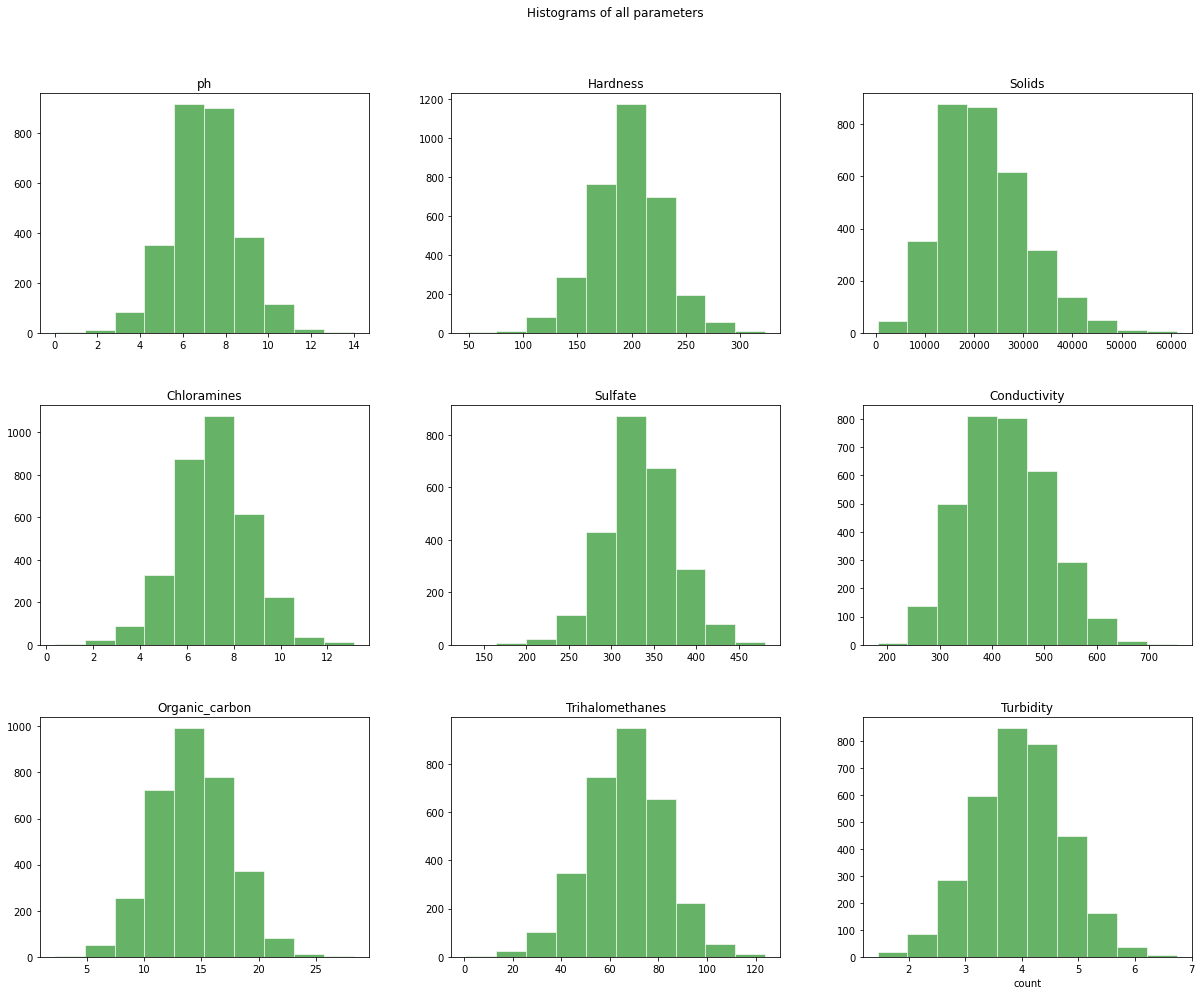

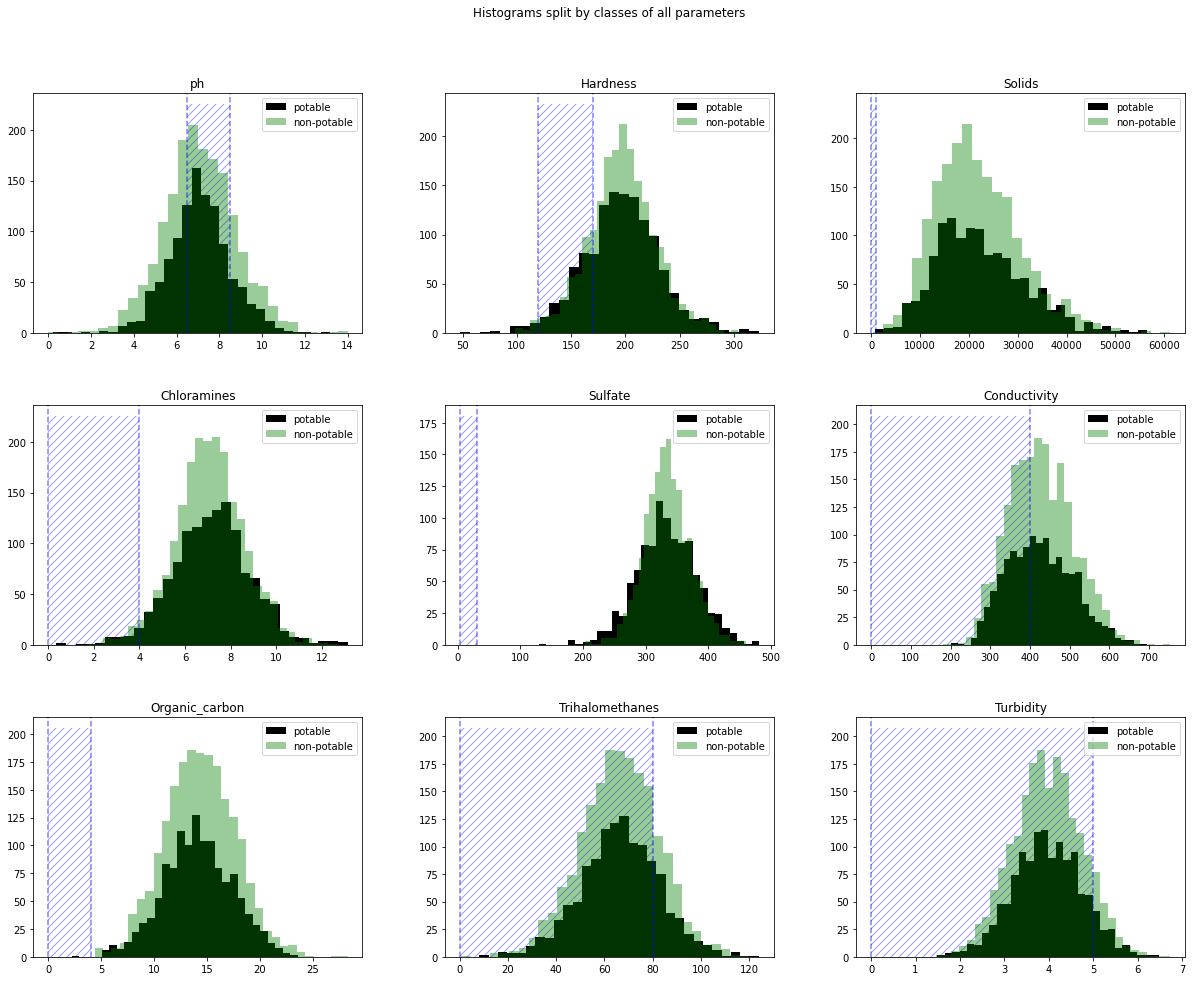

In [6]:
def visualize_all(df, n_bins, r):
    fig = plt.figure(figsize=(20, 15))
    plt.suptitle('Histograms split by classes of all parameters')
    rows = math.ceil(math.sqrt(len(water.keys()) - 1))
    cols = math.floor(math.sqrt(len(water.keys()) - 1))

    ax_array = fig.subplots(rows, cols)

    i = 0
    for param in water.keys():
        if param != 'Potability':
            i = i + 1
            potable = df[df['Potability'] == 1][param]
            no_potable = df[df['Potability'] == 0][param]

            ax = ax_array[math.ceil(i / cols) - 1, ((i - 1) % cols)]
            ax.title.set_text(param)
            ax.axvline(x=r[param][0], c='b', ls='--', alpha=.5)
            ax.axvline(x=r[param][1], c='b', ls='--', alpha=.5)
            ax.hist(potable, bins=n_bins, color='black', alpha=1, label='potable')
            ax.hist(no_potable,
                    bins=n_bins,
                    color='green',
                    alpha=0.4,
                    label='non-potable')
            ax.legend()
            y_bottom, y_top = ax.get_ylim()
            ax.fill_betweenx([0, y_top + 10],
                             r[param][0],
                             r[param][1],
                             hatch="///",
                             facecolor="none",
                             edgecolor="b",
                             linewidth=0.01,
                             
                             alpha=.4)
#             ax.set_xlabel('count')
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.25,
                        hspace=0.3)
    
    plt.show()

# Histograms of all numeric features
parameters = water.drop(['Potability'], axis=1)
parameters.hist(figsize=(20, 15),color='green',grid=False,edgecolor='white',alpha=.6)
plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.25,
                        hspace=0.3
                   );
plt.xlabel('count')
plt.suptitle('Histograms of all parameters')
visualize_all(water, 30, dict_range)

- **Distribution**:
    - All parameters have a normal distribution
    - Potable and non-potable categories are pretty similar: distributions are centered on the same region and same spread over the range
    - We cannot find a single parameter capable of differentiating between potable and non-potable
- **Constant values**:
    - None
- **Theoretical potable range**:
    - By WHO, water with pH < 6.5 is not considered drinkable. However, we have 258 water bodies with pH < 6.5 classified as potable. For example, the pH of gastric acid ranges from 1.5 to 3.5, and we have one sample with the pH equals to 0.22 and  classified as drinkable. So something is wrong with the data.
    - `Solids`, `Sulfates`, and `Organic Carbon` distributions are entirely out of the potable range.

### 2.4.2. Outliers and Statistical summary grouped by potability

- Visualization of each parameter split into potable and non-potable using a box-plot
- Evaluation of the summary of their statistical metrics.

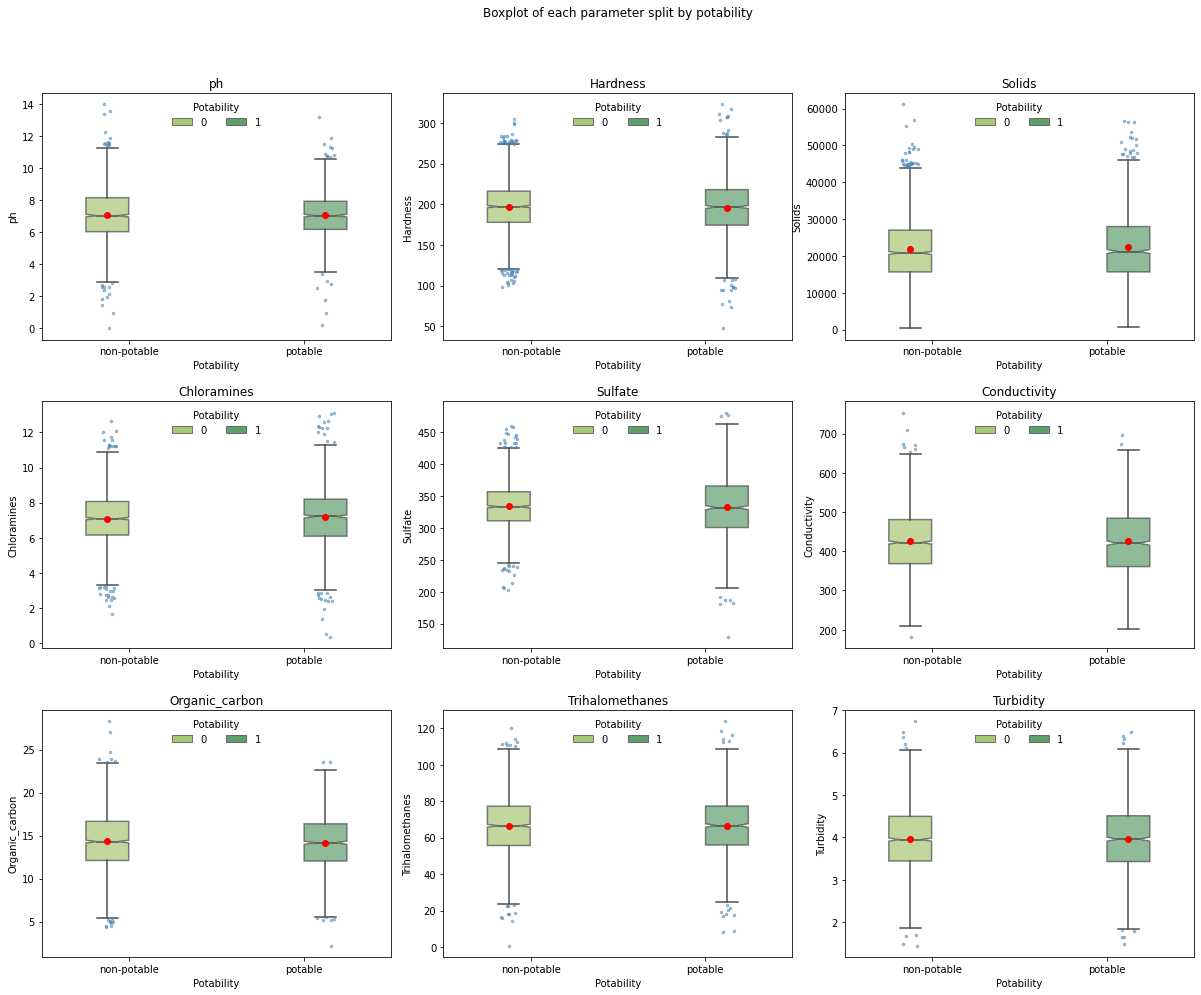

,count,mean,std,min,25%,50%,75%,max
ph,2785.00,7.08,1.59,0.00,6.09,7.04,8.06,14.00
Hardness,3276.00,196.37,32.88,47.43,176.85,196.97,216.67,323.12
Solids,3276.00,22014.09,8768.57,320.94,15666.69,20927.83,27332.76,61227.20
Chloramines,3276.00,7.12,1.58,0.35,6.13,7.13,8.11,13.13
Sulfate,2495.00,333.78,41.42,129.00,307.70,333.07,359.95,481.03
Conductivity,3276.00,426.21,80.82,181.48,365.73,421.88,481.79,753.34
Organic_carbon,3276.00,14.28,3.31,2.20,12.07,14.22,16.56,28.30
Trihalomethanes,3114.00,66.40,16.18,0.74,55.84,66.62,77.34,124.00
Turbidity,3276.00,3.97,0.78,1.45,3.44,3.96,4.50,6.74
Potability,3276.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00


In [7]:
def visualize_all_box(df, group):
    rows = math.ceil(math.sqrt(len(df.keys()) - 1))
    cols = math.floor(math.sqrt(len(df.keys()) - 1))

    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 15))
    fig.suptitle('Boxplot of each parameter split by potability')

    i = 0
    for param in water.keys():
        if param != 'Potability':
            i = i + 1

            r = int((i - 1) / cols)
            c = i - r * cols - 1
            sns.boxplot(ax=axes[r, c],
                        data=df,
                        x=group,
                        y=param,
                        hue=group,
                        palette='summer_r',
                        showmeans=True,
                        meanprops={
                            "marker": "o",
                            "markerfacecolor": "red",
                            "markeredgecolor": "red"
                        },
                        flierprops=dict(marker='.',
                                        markerfacecolor='steelblue',
                                        markeredgecolor='steelblue',
                                        alpha=.5),
                        boxprops=dict(alpha=.7),
                        width=.5,
                        notch=True).set_title(param)

            for line in axes[r, c].get_lines()[6::7]:
                #                 line.set_mec('purple') # to test that we have the correct Line2Ds
                offsets = line.get_xdata()
                #                 print(y)
                line.set_xdata(offsets +
                               np.random.uniform(-0.05, 0.05, offsets.size))

            axes[r, c].legend(loc='upper center',
                              title=group,
                              frameon=False,
                              ncol=2)
            axes[r, c].set_xticklabels(['non-potable', 'potable'])
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.15,
                        hspace=0.25)
    plt.show()


visualize_all_box(water, 'Potability')

# Statistical summary of the numerical columns
summ = water.describe().transpose()
summ

Boxplots:
- **Median:** values for potable and non-potable are very similar for all the parameters.
- **Quartiles:** have the same range for both classes.
- **Max/Min**: no significant differences between the classes.
- **Outliers**: there are outliers, but they are not so numerous.

Statistical summary:
- **Mean x median**: metrics have close values (expected for normal distributions)
- **Skew (symmetry)**: 25% and 75% are consistently almost symmetrical to the median (expected for normal distributions)
- **Range**: no negative values (per the parameter definitions). The range among all parameters is wide.
- **Anomalies** (e.g., outside the range such as -1 and 999): absent

*Mean and standard deviation with similar values for both classes indicate a poor discriminator in the classification task.*

### 2.4.3 Correlation heatmap

A great way to gain a high-level view of relationships amongst the parameters.

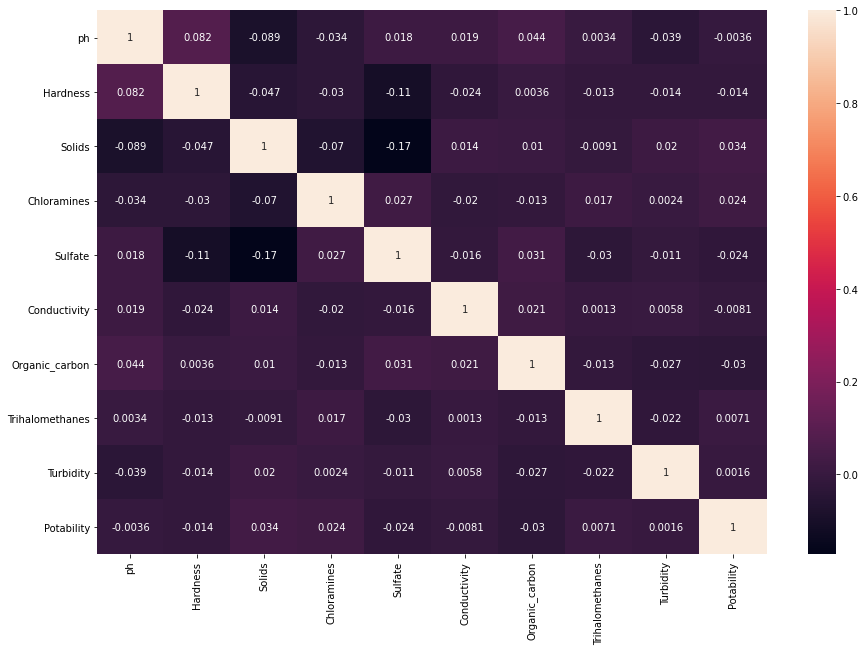

In [8]:
#Show a seaborn heatmap of correlations in data
plt.subplots(figsize=(15, 10))
sns.heatmap(water.corr(), annot=True);

- We could correlate `Turbidity` with `Solids` and `Organic_carbon`, but they do not have a higher correlation in the data.
- No strong correlations were found in the data set.

### 2.4.4 Classification: measured *vs.* expected

Following, we have each parameter labeled as **expected**, when the class matches the theoretical classification and **non-expected** otherwise.

There is one column for each measured class and the colors represent labels: dark green is expected and light green non-expected.

The ideal scenario is all the measured class matching the theoretical classification and getting the label expected. So all bars in dark green.

In [9]:
def label_param(df, param, group_by_param, label_values, label_names):
    df = df[[param, group_by_param]]
    df = df.dropna()
    df[param + '_cat'] = pd.cut(df[param],
                                bins=label_values,
                                labels=label_names)
    clfd = df
    conditions = [
        (clfd[group_by_param] == 1) & (clfd[param + '_cat'] == 'potable'),
        (clfd[group_by_param] == 0) & (clfd[param + '_cat'] != 'potable'),
        (clfd[group_by_param] == 1) & (clfd[param + '_cat'] != 'potable'),
        (clfd[group_by_param] == 0) & (clfd[param + '_cat'] == 'potable'),
    ]
    choices = ['expected', 'expected', 'non-expected', 'non-expected']
    clfd['classification'] = np.select(conditions, choices, default=0)
    ranges = clfd.drop(columns=[param + '_cat'])
    
    ranges = ranges.groupby([group_by_param, 'classification']).agg(['count'])
    ranges = ranges[param].reset_index()
    ranges = ranges.pivot(index='classification', columns=group_by_param, values='count')
    
    ranges = ranges.fillna(0)

    return ranges

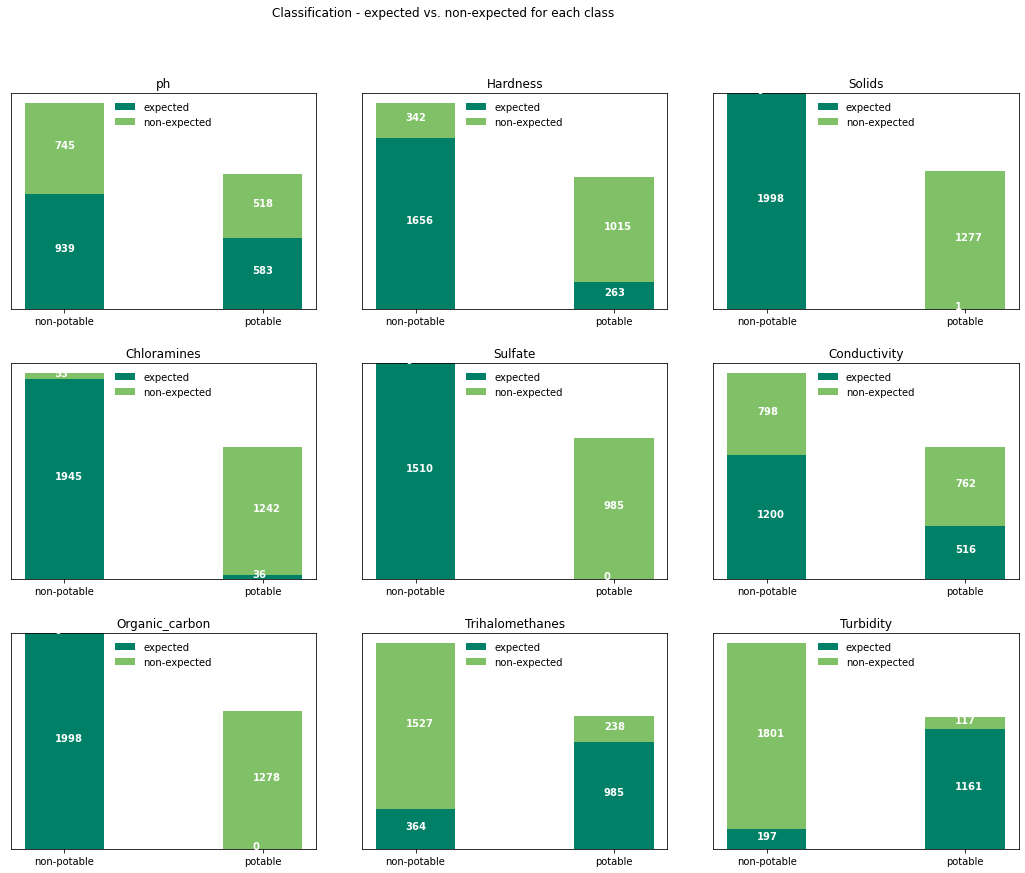

In [10]:
def visualize_all_labeled(df, group_by_param):
    rows = math.ceil(math.sqrt(len(df.keys()) - 1))
    cols = math.floor(math.sqrt(len(df.keys()) - 1))

    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 15))
    fig.suptitle('Classification - expected vs. non-expected for each class')

    i = 0
    for param in water.keys():
        if param != 'Potability':
            i = i + 1

            r = int((i - 1) / cols)
            c = i - r * cols - 1

            ax = axes[math.ceil(i / cols) - 1, ((i - 1) % cols)]
            ax.title.set_text(param)

            data = label_param(water, param, group_by_param,
                               dict_labels[param][0], dict_labels[param][1])
            columns = list(data.keys())
            #             print(param)
            #             print(data)

            # Get some pastel shades for the colors
            n_entries = len(data)
            #             print(n_entries)
            colors = plt.cm.summer(np.linspace(0, 0.5, len(data)))

            index = np.arange(len(columns)) + 0.3
            bar_width = 0.4

            # Initialize the vertical-offset for the stacked bar chart.
            y_offset = np.zeros(len(columns))

            # Plot bars and create text labels for the table
            cell_text = []
            for e in range(n_entries):
                x = list(data.keys())
                #                 print(x)
                y = list(data.iloc[e])
                #                 print(y)
                ax.bar(x, y, bar_width, bottom=y_offset, color=colors[e])

                for n, v in enumerate(y):
                    ax.text(x[n] - .05,
                            int(v / 2) + y_offset[n],
                            str(int(v)),
                            color='white',
                            fontweight='bold')
                y_offset = y_offset + y
                cell_text.append(['%1.0f' % (x) for x in y])

            # Reverse colors and text labels to display the last value at the top.
            # colors = colors[::-1]
            # cell_text.reverse()

            # Add a table at the bottom of the axes


#             the_table = ax.table(cellText=cell_text,
#                                   rowLabels=list(data.index),
#                                   rowColours=colors,
#                                   colLabels=['non-potable','potable'],
#                                   loc='bottom')

            ax.set_xticks(list(data.keys()))
            ax.set_xticklabels(['non-potable', 'potable'])
#             ax.set_ylabel('Count')
            ax.set_yticks([])
            axes[r, c].legend(['expected', 'non-expected'],
                              loc='upper center',
                              frameon=False)
            #             axes[r,c].legend(loc='upper center', frameon=False, ncol=2)
            #             plt.legend(list(data.keys()))
            #             axes[r,c].legend(, title=data.keys(), frameon=False, ncol=2)
            plt.subplots_adjust(left=0.1,
                                bottom=0.1,
                                right=0.9,
                                top=0.9,
                                wspace=0.15,
                                hspace=0.25)

    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.2, bottom=0.2)
    plt.show()

visualize_all_labeled(water, 'Potability')

The ideal scenario is all the bars in dark green. However, there are values classified as potable in the non-potable bar and vice-versa, what could be considered as errors.
- **Classification correctness:** majority of the classification measured is not agreeing with the expected category taking WHO standards into consideration for all parameters.

- **Trend:** the misclassification of potable and non-potable water is common for all parameters with no preference for any class.

    - [rephrase] `Chloramines`, the amount of Chlorine in the water, suggests that the data is composed of water heavily treated once the distribution shows a more prominent occurrence of values above what is considered potable. Supposing that, even after intensive treatment, they were classified as potable because there was no other water source available, and they have to ignore WHO criteria. If data come from somewhere following WHO standards strictly, we could confirm a big issue with the classification data.

Once we have so many errors in classification and we do not have further information about the data source, we could imagine the following some scenario: data from locations without another source of water, and it was classified as potable simply considering if they were consumed by the population or not.

### 2.4.5 Considerations

Data is showing to be an unreliable source of information for the classification of the water as potable or non-potable:
- **Statistical significance**
    - The average, shape, and spread of the distribution of all parameters for potable and non-potable water overlaps. It indicates that statistical analysis won't be meaningful due to a poor statistical significance.
- **Wrong classification**
    A considerable amount of data is being classified as potable, outside the presumed drinkable range for all the parameters. However, the opposite also is true; many entries are classified as non-potable while belonging to the presumed potable range.

Although the exploratory data analysis suggests that the classification is wrong, we will consider it correct once we don't have further information about the origin of the data. However, we are not expecting the models' good performance once the potable and non-potable are pretty similar and not the best for the modeling.

## 2.5 Principle components analysis [(PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

The basic steps are:

1. scale the data
2. fit the PCA transformation
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

### 2.5.1 Scale the data

In [11]:
water_summary = water.groupby('ph').agg(
    #     count=pd.NamedAgg(column='Hardness', aggfunc='size'), #could pick any column here
    Hardness=pd.NamedAgg(column='Hardness', aggfunc='sum'),
    Solids=pd.NamedAgg(column='Solids', aggfunc='sum'),
    Chloramines=pd.NamedAgg(column='Chloramines', aggfunc='sum'),
    Sulfate=pd.NamedAgg(column='Sulfate', aggfunc='sum'),
    Conductivity=pd.NamedAgg(column='Conductivity', aggfunc='sum'),
    Organic_carbon=pd.NamedAgg(column='Organic_carbon', aggfunc='sum'),
    Trihalomethanes=pd.NamedAgg(column='Trihalomethanes', aggfunc='sum'),
    Turbidity=pd.NamedAgg(column='Turbidity', aggfunc='sum'),
    # Potability=pd.NamedAgg(column='Potability', aggfunc='sum'),
).reset_index()
# water_summary.head()

#New dataframe, `db_summary_scale` from `db_summary` whilst setting the index to the selected criteria
df_summary_scale = water_summary.set_index('ph', drop=True)
water_summary = water_summary.set_index('ph', drop=True)
#Save the index's labels (using the index attribute of `db_summary_scale`) into the variable 'db_summary_index'
df_summary_index = df_summary_scale.index
#Save the column names (using the `columns` attribute) of `db_summary_scale` into the variable 'db_summary_columns'
df_summary_columns = df_summary_scale.columns
# df_summary_scale.head()
df_summary_scale.dtypes

Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

- Columns are all numeric

In [12]:
# Scale data
df_summary_scale = scale(df_summary_scale)

#Create a new dataframe from `db_summary_scale` using the column names `db_summary_columns`
df_summary_scaled_df = pd.DataFrame(df_summary_scale,
                                    columns=df_summary_columns)
# df_summary_scaled_df.head()

Validating the scaling:
- Check the average, standard deviation, and unbiased standard deviation estimator (ddof = 1)

In [13]:
#Call `db_summary_scaled_df`'s `mean()` method
validate = df_summary_scaled_df.agg(['mean', 'std']).T
validate['ddof_1'] = df_summary_scaled_df.std(ddof=0)
validate

,mean,std,ddof_1
Hardness,0.00,1.00,1.00
Solids,0.00,1.00,1.00
Chloramines,-0.00,1.00,1.00
Sulfate,0.00,1.00,1.00
Conductivity,-0.00,1.00,1.00
Organic_carbon,-0.00,1.00,1.00
Trihalomethanes,0.00,1.00,1.00
Turbidity,-0.00,1.00,1.00


- average is zero
- all variables with the same standard deviation
- STD(ddof) = 1 as expected in a scaling

### 2.5.2 PCA transformation

Fit the PCA transformation using the scaled data.

In [14]:
df_pca = PCA().fit(df_summary_scale)

Plot the cumulative variance ratio with number of components.

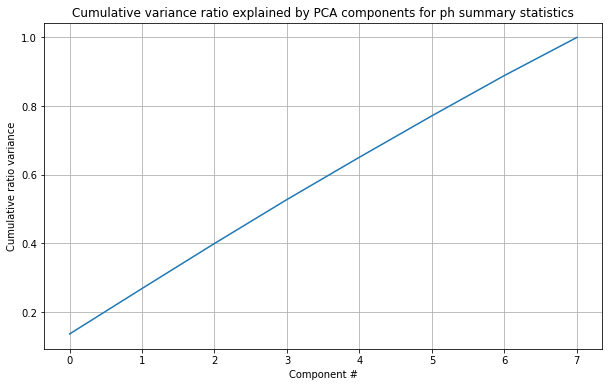

In [15]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `db_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for ph summary statistics');
plt.grid()

- There are no relevant components explaining the variance of the data.

In [16]:
#Call `db_pca`'s `transform()` method, passing in `db_summary_scale` as its argument
df_pca_x = df_pca.transform(df_summary_scale)
# df_pca_x.shape

Plot the first two derived features (the first two principle components) and label each point.

In [17]:
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by db_pca_x[:, 0],
#and the second by db_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `db_summary_index`
pca_df = pd.DataFrame({
    'PC1': df_pca_x[:, 0],
    'PC2': df_pca_x[:, 1]
},
                      index=df_summary_index)
# pca_df.head()

Concatenating both parts on axis 1 and using the indexes.

In [18]:
water_avg_potability = water.groupby('ph')['Potability'].mean()
# water_avg_potability.sort_values(ascending=False).head()

In [19]:
#Use pd.concat to concatenate `pca_df` and `db_avg` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, water_avg_potability], axis=1)
pca_df.head()

,PC1,PC2,Potability
ph,,,
0.00,2.69,-2.45,0
0.23,2.68,0.20,1
0.98,0.60,3.08,0
0.99,-0.51,-2.03,1
1.43,-0.08,-0.16,0


In [20]:
# pca_df.dtypes

Checking for missing values

In [21]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,Potability
ph,,,


- No missing values

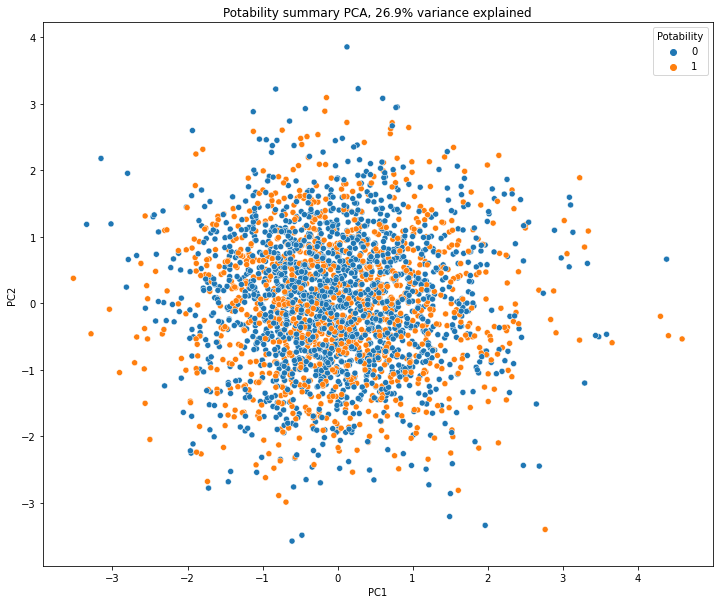

In [22]:
# Create a seaborn scatterplot by calling `sns.scatterplot`
# Specify the dataframe pca_df as the source of the data,
# specify 'PC1' for x and 'PC2' for y,
# specify 'target' for the pointsize (scatterplot's `size` argument),
# specify 'catergories' foar `hue`
# specify sorter for `hue_order`
x = pca_df.PC1
y = pca_df.PC2
ph = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Potability',
    data=pca_df,
    hue_order=pca_df.Potability.sort_values(ascending=True).unique())
# sns.scatterplot(x='PC1', y='PC2', size='Potability', hue='Quartile',
#                 hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#if the amount of data allows, annotate with the labels
# for s, x, y in zip(ph, x, y):
#     plt.annotate(s, (x, y))
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
plt.title(f'Potability summary PCA, {pc_var:.1f}% variance explained');

- No clustering by PCA and potability
- No visible patterns

In [23]:
pd.DataFrame(df_pca.components_, columns=df_summary_columns)

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.18,0.69,-0.53,-0.15,0.21,-0.04,-0.27,0.28
1,0.46,-0.06,-0.39,0.14,-0.12,0.61,-0.31,-0.37
2,0.51,-0.06,-0.11,-0.72,0.30,-0.13,0.29,-0.06
3,0.40,-0.05,0.05,-0.12,-0.58,-0.36,-0.45,0.38
4,-0.15,0.33,-0.14,-0.14,-0.56,-0.26,0.26,-0.62
5,-0.20,0.14,0.54,-0.40,0.14,0.12,-0.58,-0.34
6,0.06,-0.26,-0.27,0.27,0.38,-0.62,-0.33,-0.38
7,0.52,0.57,0.42,0.41,0.18,-0.10,0.13,-0.07


- No remarkable values could be found in the components of the PCA.

## 2.6 EDA Conclusions

So far, we couldn't find classifiers to define the water as potable.

- Numerical: 10

- Categorical: 0

Data seems to be incorrect for the classification and the distribution for each category. We will carry on the analysis once we don't have more details about the data source. We cannot be sure if the data is wrong or if this a really poor  situation for the consumers of this water.

# 3. Modeling

During the data assessment we did not remove any column or adjusted any entries. But we have missing values that must be treated.

## 3.1 Data treatment

Cleansing and adjusting data to be used in the model:
- missing values
- scaling
- splitting the data into training and test sets

### 3.1.1 Missing values

Rows with some missing entry will be removed once we have enough rows with all the entries as shown below.

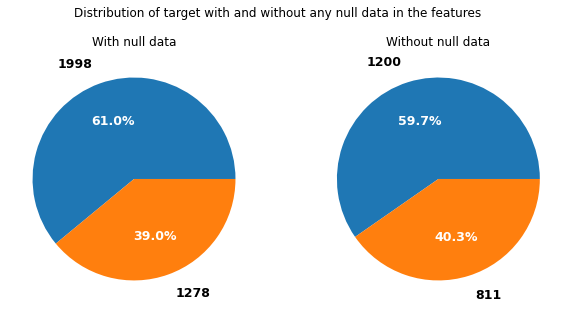

In [24]:
p1 = water.groupby('Potability')['Potability'].agg(['count'])
p1['percentage'] = p1['count']  / p1['count'].sum()
# p1['labels'] = [str("{:.1%}".format(p1['percentage'][i])) + ": " + str(p1['count'][i]) for i in range(0,len(p1))]

water_clean = water.dropna()
p2 = water_clean.groupby('Potability')['Potability'].agg(['count'])
p2['percentage'] = p2['count']  / p2['count'].sum()
# p2['labels'] = [str("{:.1%}".format(p2['percentage'][i])) + ": " + str(p2['count'][i]) for i in range(0,len(p2))]

p = pd.concat([p1,p2],axis=1,keys=['full','without_missing'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
fig.suptitle('Distribution of target with and without any null data in the features')

ax1 = plt.subplot2grid((1,2),(0,0))
ax1,texts,autopcts = plt.pie(p1['count'], labels=p1['count'], autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2)
plt.title('With null data')
plt.setp(texts,**{'color':'black', 'weight':'bold', 'fontsize':12.5})
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})


ax1 = plt.subplot2grid((1,2),(0,1))
ax1,texts,autopcts = plt.pie(p2['count'], labels=p2['count'], autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2)
plt.setp(texts,**{'color':'black', 'weight':'bold', 'fontsize':12.5})
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.title('Without null data');

Data with missing entries:
- Total rows: **3276**
- Distribution: 61% non-potable / 39% potable

Removing rows with any missing entry:
- Total rows removed: **1265**

**Data without missing entries**:
- Distribution: 60% non-potable / 40% potable
- Total rows: **2011**

### 3.1.2 Scaling

The parameters have different units, varying by orders of magnitude. Scaling will put them all on a consistent range.
To evaluate any effect of the scaling on the the performance of the models, we will test different scaling methods:
1. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) scales each feature to zero mean and unit variance.
2. [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.
3. [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) remove the outliers and then use either *StandardScaler* or *MinMaxScaler*.

In [25]:
x = water_clean.drop(['Potability'], axis=1)
y = water_clean['Potability']

cols = x.columns

std_scl = StandardScaler()
standard_df = x
standard_df[cols] = std_scl.fit_transform(x[cols])

min_max = MinMaxScaler()
minmax_df = x
minmax_df[cols] = min_max.fit_transform(x[cols])

rbt_scl = RobustScaler()
robust_df = x
robust_df[cols] = rbt_scl.fit_transform(x[cols])

scaling = [
    ('StandardScaler', standard_df, y),
    ('MinMaxScaler', minmax_df, y),
    ('RobustScaler', robust_df, y)
]

### 3.1.3 Train/Test sets

- 70/30 train/test split
- Random sampling and uniform sampling (stratified)

In [26]:
sampling = ['random','stratified']

train_sets = []
for name, x, y in scaling:
    parameters = x
    target = y
    for s in sampling:
        if s == 'random':
            x_train, x_test, y_train, y_test = train_test_split(
                parameters,
                target,
                test_size=0.3,
                random_state=47
                )
        else:
            x_train, x_test, y_train, y_test = train_test_split(
                parameters,
                target,
                test_size=0.3,
                random_state=47,
                stratify=y
                )
        train_sets.append([name,s,x_train, x_test, y_train, y_test])
# train_sets

In [27]:
split = [
    ('Data shape:', water_clean.shape),
    ('Train set - parameters:', x_train.shape),
    ('Train set - target:', y_train.shape),
    ('Test set - parameters:', x_test.shape),
    ('Test set - target:', y_test.shape)
]
split

[('Data shape:', (2011, 10)),
 ('Train set - parameters:', (1407, 9)),
 ('Train set - target:', (1407,)),
 ('Test set - parameters:', (604, 9)),
 ('Test set - target:', (604,))]

In [28]:
#Check the `dtypes` attribute of `x_train` to verify all features are numeric
print()
print('Data train types:'),
print(x_train.dtypes)

#Repeat this check for the test split in `x_test`
print()
print('Data test types:'),
print(x_test.dtypes)


Data train types:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

Data test types:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object


- All nine parameters are numeric attributes.
- Total rows: 2011
- Training set rows: 1407
- Test set rows: 604

## 3.2 Classifiers

Six supervised classification models evaluated:

1. **Logistic Regression (Logit model)**
    - It models the probability of well-defined classes or events (categorical) that can be binary or linears. Classification is the main application of this model.
    - *Parameters*
        - *random state:* seed to get the same results when running the model multiple times.
   

2. **K Nearest Neighbours (KNN)**
    - KNN uses the distance between the values to group them, assuming that the data is similar when close.
    - Parameters
        - *n_neighbors:* number of neighbors used.
    
    
3. **Decision Tree**
    - Decision trees create a set of rules to make the decision. These rules are evaluated and based on the decision, and you move to the following node till you reach the final classification (leaf).
    - Parameters
        - *criterion:* the function to measure the quality of a split. Gini for impurity and Entropy for the information gain. 
        - *max_depth:* the maximum depth of the tree.
        - *min_samples_leaf:* the minimum number of samples required to split an internal node.


4. **Random Forest**
(https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
    - The random forest consists of a large number of individual decision trees that operate as an ensemble.
    - Parameters
        - *n_estimators:* the number of trees in the forest.
        - *min_samples_leaf:* the minimum number of samples required to split an internal node.


5. **AdaBoost** 
(https://www.datacamp.com/community/tutorials/adaboost-classifier-python)
    - Ada-boost or Adaptive Boosting is an ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers.
    - Parameters
        - *n_estimators:* the maximum number of estimators to terminate the boosting. Case you get a perfect fit, you stop earlier in the learning procedure.
        - *learning_rate:* weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the `learning_rate` and `n_estimators parameters`.
        
    
6. **XGBoost**
(https://www.datatechnotes.com/2019/07/classification-example-with.html)
    - The XGBoost stands for eXtreme Gradient Boosting, a boosting algorithm based on gradient boosted decision trees algorithm.
    - Parameters
        - *n_estimators:* number of boosting rounds.
        - *learning_rate:* boosting learning rate.

<!-- 7. Bagging -->

### 3.2.1 Declaration

Creation of the objects for each model.

In [29]:
## MODEL DECLARATION
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# bagging = BaggingClassifier()

### 3.2.2 Parameters

Selecting a range of the most common parameters to be tested for each model.

In [30]:
## PARAMETERS

# 'parameters' of logistic regression
params_lr = {'random_state': [42]}

# parameters of knn
params_knn = {'n_neighbors': np.arange(1, 50)}

# parameters for decision tree
# "gini" for the Gini impurity and “entropy” for the information gain.
# min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model
params_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 50),
    'min_samples_leaf': [1, 2, 4, 7, 10, 20, 30, 40, 70, 100]
}

# parameters for Random Forest
# n_estimators: The number of trees in the forest.
params_rf = {
    'n_estimators': [100, 200, 350, 500],
    'min_samples_leaf': [2, 5, 10, 30]
}

# parameters fpr AdaBoost
params_ada = {
    'n_estimators': [50, 100, 250, 400, 500, 600],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1]
}

# parameters for XGBoost
params_xgb = {
    'n_estimators': [50, 100, 250, 400, 600, 800, 1000],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1]
}

### 3.2.3 Grid

Defining a grid with all the parameters to figure out the best ones.

In [31]:
## GRID PREPARATION
grid_lr = GridSearchCV(lr, param_grid=params_lr)
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5)  #search knn for 5 fold cross validation
grid_dt = GridSearchCV(dt, param_grid=params_dt, cv=5)  #grid search decision tree for 5 fold cv
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_ada = GridSearchCV(ada, param_grid=params_ada, cv=5)
rs_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

grids = [
    ('Logistic Regression', grid_knn, lr),  # grid_knn to fill the
    ('K Nearest Neighbours', grid_knn, knn),
    ('Decision Tree', grid_dt, dt),
    ('Random Forest', grid_rf, rf),
    ('AdaBoost', grid_ada, ada),
    ('XGBoost', rs_xgb, xgb)
]
# grids

### 3.2.4 Training

Running the models for all the grid of parameters the parameters with the best accuracy.

In [32]:
model_path = os.getcwd() + '\\models\\potability_models.pkl'
profile_path = os.getcwd() + '\\models\\profiling_grid.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        grids = pickle.load(f)
    with open(profile_path, 'rb') as f:
        profiling_grid = pickle.load(f)
else:
    ## TRAINING TO FIND THE BEST PARAMATERS
    c = 0
    d = []
    for i, item in enumerate(grids):
        classifier_name = item[0]
        grid = item[1]
        classifier = item[2]
        for scaler, pick, x_train, x_test, y_train, y_test in train_sets:
            c = c + 1
            print (str(c) + '/' + str(len(train_sets)*len(grids)) + ': ' + classifier_name + ' -> ' + scaler + ' - ' + pick)

            t_start = time.time()
            if classifier_name != 'XGBoost':
                grid.fit(x_train, y_train)
            else:
                grid.fit(x_train, y_train, eval_metric='logloss')

        #     print("Best parameters for " + classifier_name + ":", grid.best_params_)
            t_end = time.time()

            # Once the grid keep the best parameters as default,
            # we can evaluate the accuracy of each model checking the accuracy of the model with the test set
            t_start_test = time.time()
            # Evaluate classifier's accuracy on the test set
            y_pred = grid.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)
        #     print('{:s} : {:.2f}'.format(classifier_name, accuracy))
            t_end_test = time.time()

            d.append({
                'scaling_method': scaler,
                'sampling_method': pick,
                'classifier': classifier_name,
                'accuracy': accuracy,
                'start_training': datetime.fromtimestamp(t_start).strftime('%Y-%m-%d %H:%M:%S'),
                'end_training': datetime.fromtimestamp(t_end).strftime('%Y-%m-%d %H:%M:%S'),
                'run_time': np.abs(t_start - t_end),
                'start_test': datetime.fromtimestamp(t_start_test).strftime('%Y-%m-%d %H:%M:%S'),
                'end_test': datetime.fromtimestamp(t_end_test).strftime('%Y-%m-%d %H:%M:%S'),
                'run_time_seconds_test': np.abs(t_start_test - t_end_test),
                'best_parameters': grid.best_params_
            })

    #         if classifier_name == 'Decision Tree':
    #             bagging = BaggingClassifier(classifier,
    #                                         n_estimators=100,
    #                                         random_state=42)
    #             bagging.fit(x_train, y_train)
    #             t_end_test = time.time()
    #             t_start_test = time.time()
    #             y_pred = bagging.predict(x_test)
    #             accuracy = accuracy_score(y_test, y_pred)
    #             t_end_test = time.time()
    # 
    #             d.append({
    #                 'scaling_method': scaler,
    #                 'sampling_method': pick,
    #                 'classifier': 'Bagging',
    #                 'accuracy': accuracy,
    #                 'start_training': datetime.fromtimestamp(t_start).strftime('%Y-%m-%d %H:%M:%S'),
    #                 'end_training': datetime.fromtimestamp(t_end).strftime('%Y-%m-%d %H:%M:%S'),
    #                 'run_time': np.abs(t_start - t_end),
    #                 'start_test': datetime.fromtimestamp(t_start_test).strftime('%Y-%m-%d %H:%M:%S'),
    #                 'end_test': datetime.fromtimestamp(t_end_test).strftime('%Y-%m-%d %H:%M:%S'),
    #                 'run_time_seconds_test': np.abs(t_start_test - t_end_test),
    #                 'best_parameters': grid.best_params_
    #             })

    profiling_grid = pd.DataFrame(d)
    # Save the data
    model_path = os.getcwd() + '\\models\\'
    save_file(grids, 'potability_models.pkl', model_path)
    save_file(profiling_grid, 'profiling_grid.pkl', model_path)

### 3.2.5 Performance

Models sorted by accuracy and the best parameters for each model.

In [33]:
# Performance
# from IPython.display import display, HTML
# display(HTML(df.to_html(index=False)))

final_results = profiling_grid.sort_values('accuracy', ascending=False).drop(columns=['start_training','end_training','start_test','end_test']).reset_index(drop=True)
# a = profiling_grid.loc[:,['scaling_method','sampling_method', 'classifier','accuracy','run_time_seconds_training','best_parameters']].reset_index(drop=True)
# a.sort_values('accuracy', ascending=False)

final_results

,scaling_method,sampling_method,classifier,accuracy,run_time,run_time_seconds_test,best_parameters
0,MinMaxScaler,random,Random Forest,0.70,70.94,0.09,"{'min_samples_leaf': 2, 'n_estimators': 500}"
1,StandardScaler,random,Random Forest,0.69,68.71,0.07,"{'min_samples_leaf': 2, 'n_estimators': 350}"
2,MinMaxScaler,stratified,Random Forest,0.69,68.44,0.04,"{'min_samples_leaf': 2, 'n_estimators': 200}"
3,RobustScaler,random,Random Forest,0.69,70.48,0.07,"{'min_samples_leaf': 2, 'n_estimators': 350}"
4,RobustScaler,stratified,Random Forest,0.68,68.11,0.06,"{'min_samples_leaf': 2, 'n_estimators': 350}"
5,StandardScaler,stratified,Random Forest,0.68,69.10,0.09,"{'min_samples_leaf': 5, 'n_estimators': 500}"
6,MinMaxScaler,random,K Nearest Neighbours,0.67,5.72,0.04,{'n_neighbors': 35}
7,RobustScaler,random,K Nearest Neighbours,0.67,5.84,0.05,{'n_neighbors': 35}
8,StandardScaler,random,Logistic Regression,0.67,5.97,0.04,{'n_neighbors': 35}
9,StandardScaler,random,K Nearest Neighbours,0.67,5.76,0.04,{'n_neighbors': 35}


### 3.2.6 Modeling results

In [34]:
profiling_grid['performance_ratio'] = profiling_grid['accuracy']/profiling_grid['run_time']
profiling_grid['run_time_mean'] = profiling_grid.groupby('classifier')['run_time'].transform('mean')
profiling_grid['accuracy_mean'] = profiling_grid.groupby('classifier')['accuracy'].transform('mean')
profiling_grid['performance_average'] = profiling_grid.groupby('classifier')['performance_ratio'].transform('mean')
profiling_grid['rank_overall'] = profiling_grid['performance_ratio'].rank(method='dense', ascending=False)
profiling_grid['rank_average'] = profiling_grid['performance_average'].rank(method='dense', ascending=False)
# df['Average'] = df.groupby('Country')['value'].transform('mean')
# df['Rank'] = df['Average'].rank(method='dense', ascending=False)

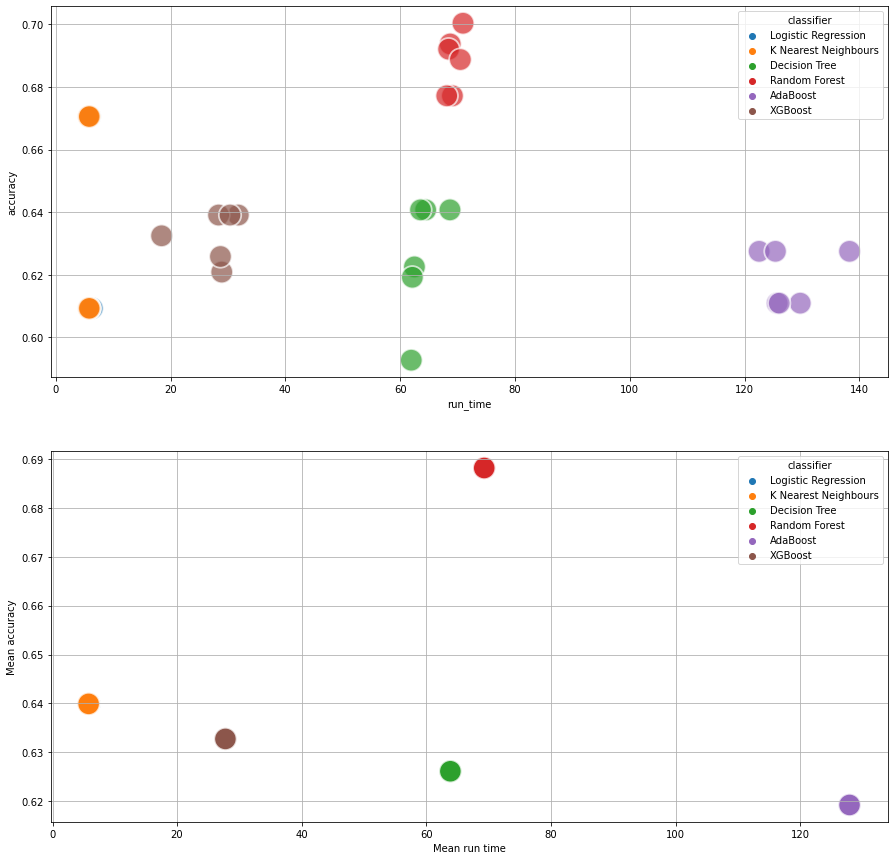

In [36]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 15))
sns.scatterplot(ax=axes[0], x='run_time', y='accuracy', data=profiling_grid, s=500, alpha =0.7, hue='classifier');
# plt.y_label('Run time') #y label

sns.scatterplot(ax=axes[1], x='run_time_mean', y='accuracy_mean', data=profiling_grid, s=500, alpha =0.7, hue='classifier');
plt.xlabel('Mean run time') #y label
plt.ylabel('Mean accuracy') #x label
# plt.grid()
plt.rcParams['axes.grid'] = True

First graph with all the combinations of scaling, sampling showcased individually. After the average accuracy and average run time.
- `Random Forest` had the best accuracy for all set of scenarios, and the time to train the model is the middle of the range of run time
- `KNN` was the fastest model and the second most accurate
- `Logistic regression` is almost tied with `KNN`
- `AdaBoost` was the slowest and also the worst accuracy. The extra time does not improve the accuracy.
- `XGBoost` was faster and slightly better than `Decision Trees`

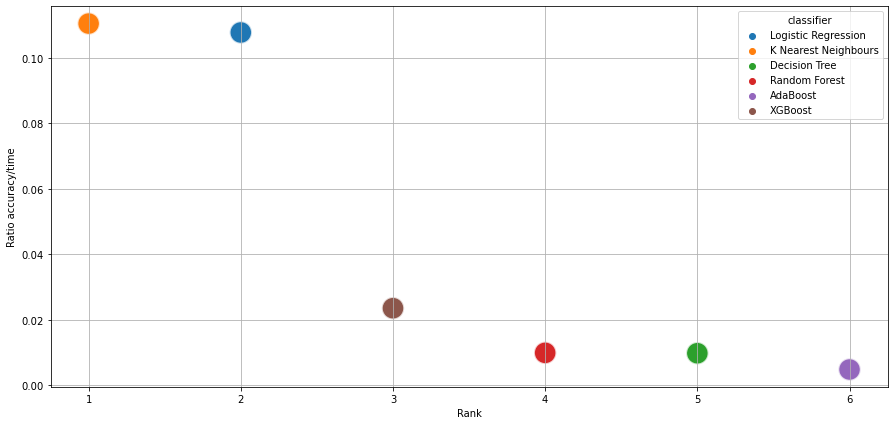

In [37]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15, 7))
# sns.scatterplot(ax=axes, x='rank_overall', y='performance_ratio', data=profiling_grid, s=500, alpha =0.7, hue='classifier');
sns.scatterplot(ax=axes, x='rank_average', y='performance_average', data=profiling_grid, s=500, alpha =0.7, hue='classifier');
plt.xlabel('Rank') #x label
plt.ylabel('Ratio accuracy/time') #y label

plt.rcParams['axes.grid'] = True
# plt.grid()

The ratio accuracy over time brings `KNN` as the champion, because it is the fastest among the models and got the second highest accuracy, behind of the `Random Forest`.
`ADABoost` has the lowest ratio, consequence of the combination high time to train and low accuracy.

So the `KNN` could be considered the best model. However, the time required to train a `Random forest` is acceptable and the increase in accuracy compared to `KNN` worth the extra time.

In [38]:
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes,
                      color='gray')
    line.set_clip_on(False)
    ax.add_line(line)


def label_len(my_index, level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k, g in groupby(labels)]


def label_group_bar_table(ax, df, adj):
    ypos = -.1
    scale = 1. / df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index, level):
            r = 0
            if rpos == 1 and adj > 0:
                r = 90
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos,
                    ypos - adj,
                    label,
                    ha='center',
                    rotation=r,
                    transform=ax.transAxes)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1


#         for tick in ax.get_xticklabels():
#         tick.set_rotation(0)


def multi_index_x_label(data, adj):
    fig = plt.figure(figsize=(20, 15))
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Accuracy')

    data.plot(kind='bar', ax=fig.gca())
    # Remove default labels
    ax.set_xticklabels('')
    ax.set_xlabel('')

    label_group_bar_table(ax, df, adj)
    fig.subplots_adjust(bottom=.1 * df.index.nlevels)

    plt.legend(loc='upper center',
               title='',
               frameon=False,
               ncol=len(df.columns))
    # plt.legend(np.array(list(df.columns))[:,1])
    plt.show()
    
# multi_index_x_label(df,.05)

In [39]:
performance = profiling_grid.loc[:,['scaling_method','sampling_method', 'classifier','accuracy']]

Following we have the combinations of classifier, sampling method, and scaling method to evaluate the impact of all these aspects in the accuracy.

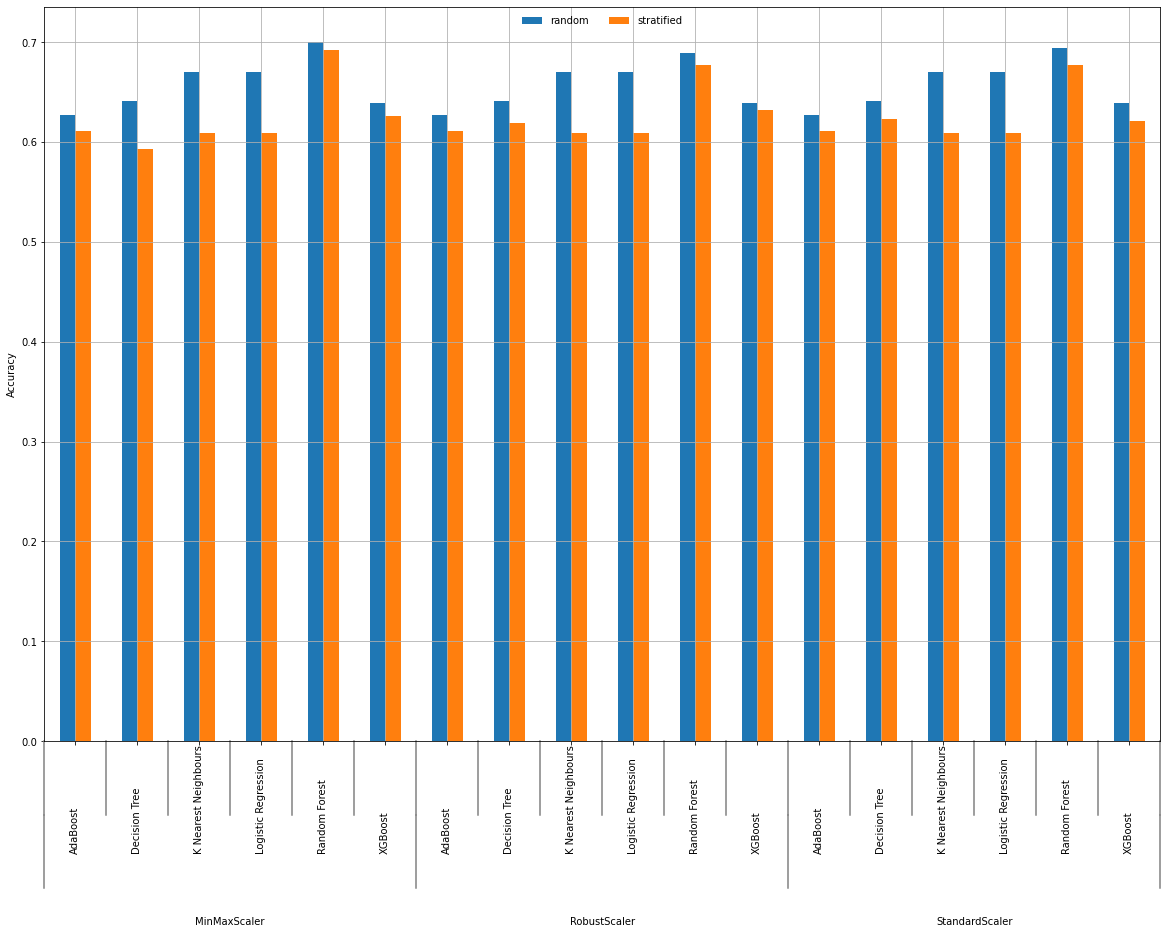

In [40]:
df = performance.groupby(['sampling_method','scaling_method','classifier']).accuracy.sum().unstack(0)
multi_index_x_label(df,.05)

- **Random sampling** performs slightly better than **Stratified sampling** for all classifiers and scaling techniques.

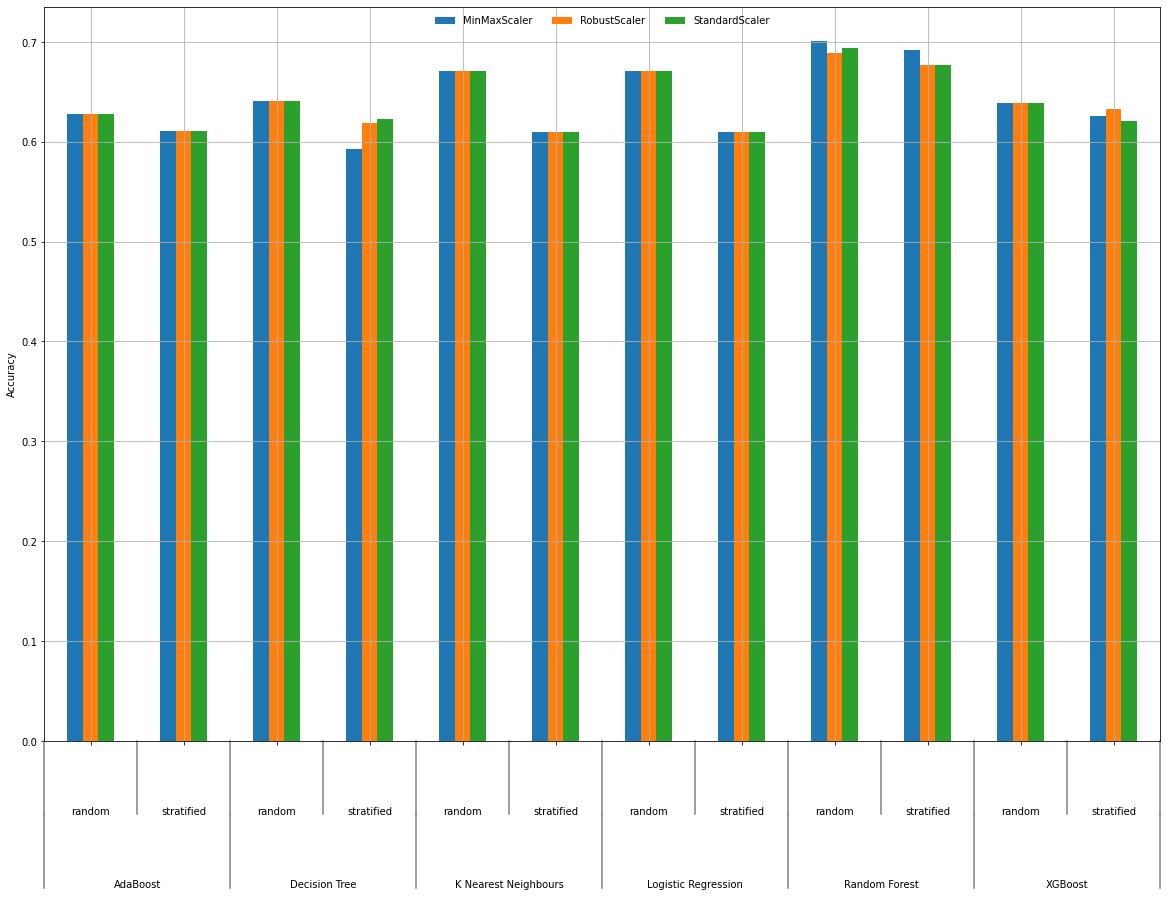

In [41]:
df = performance.groupby(['scaling_method','classifier','sampling_method']).accuracy.sum().unstack(0)
multi_index_x_label(df,0)

- In general **StandardScaler**, **MinMaxScaler**, and **Robust Scaler** do not change the accuracy of the classifiers.
- The accuracy had minor differences according to the scaling method for the `Decision Tree`, `Random Forest`, and `XGBoost`.

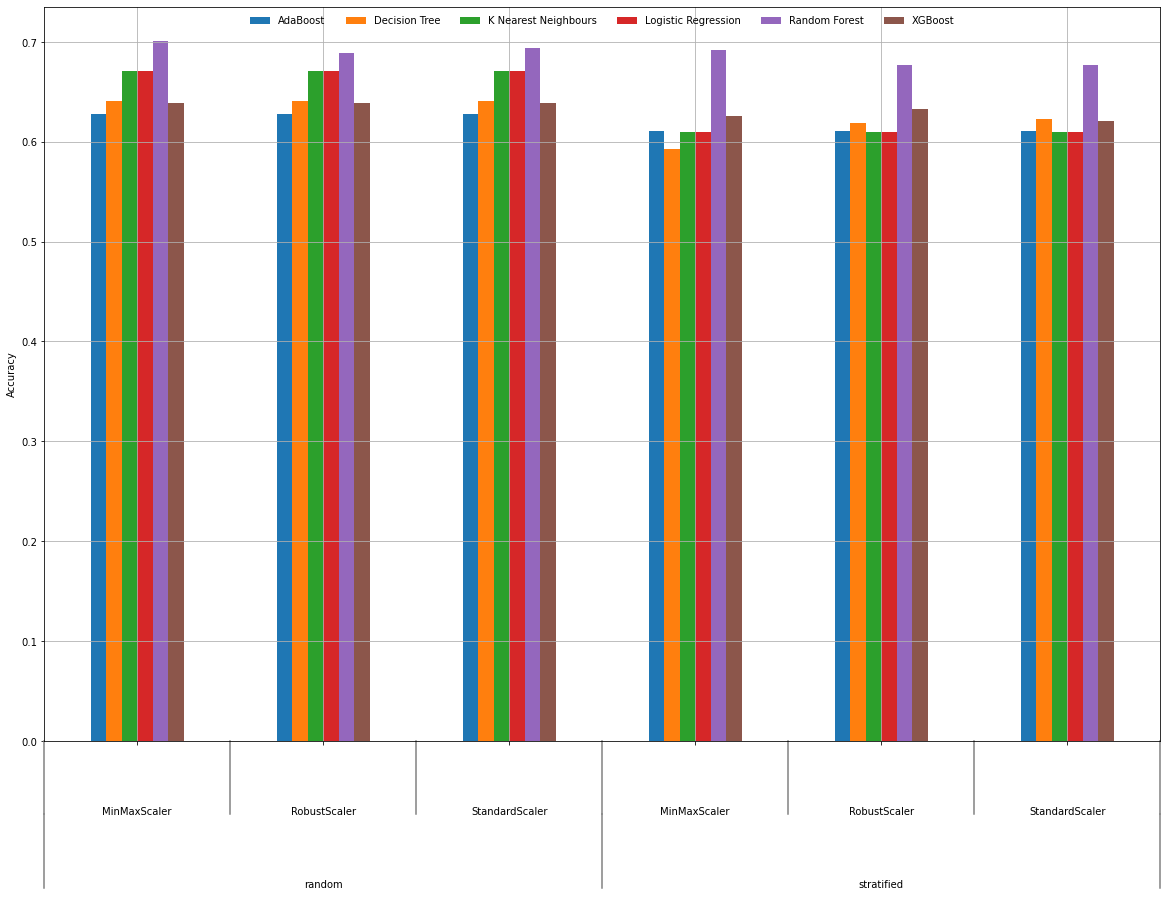

In [42]:
df = performance.groupby(['classifier','sampling_method','scaling_method']).accuracy.sum().unstack(0)
multi_index_x_label(df,0)

- `Random Forest` had the best accuracy for any sampling or scaling method.
- Using the stratified sampling, `Random Forest` had an accuracy 10% better than the other classifiers on average.

# 4 Conclusions

The goal of the project was to classify samples from water bodies as potable or not. We tested six different classifiers exploring a large set of parameters and evaluating three scaling methods and two sampling techniques.

**Modeling**
- The best model considering the accuracy was the `Random Forest` adopting the parameters 'min_samples_leaf': 2 and 'n_estimators': 500 achieving an accuracy of *70%*.
- The winner `Random Forest` used the *random* sampling technique and *MinMaxScaler* data scaling.
- This model took approximately 70 seconds to run.

- When we added the processing time to this equation, `KNN` had the best accuracy over time ratio. However, the extra time to run the `Random Forest` is small given the gain in accuracy obtained. So we can call the `Random Forest` our best option over the classifiers tested here.

See below the top 5 classifiers by accuracy.

**Data**

Besides reaching 70% of accuracy, the data quality raises some concerns and could be classified as unreliable data with poor  quality:
- Classification measured is discrepant with the expected classification.
- All parameters have a heavy overlapping distribution for potable and non-potable.
- Absence of correlation between parameters that should be correlated, such as the known correlation between pH and potability.

**Final thoughts**

The physical properties presented are accurate predictors of portability, as can be found in the academic literature. However, the analysis of this data showed us a substantial discrepancy between the expected and the measured. Unless we deal with data from areas without alternatives, those samples should never be classified as potable. So the only reasonable explanation is that the classification field is wrong.

**Conclusion**

Our solution should not be used as a good predictor for water potability based on the physical properties of the water due to this doubt about the data quality.

**Alternative solution**

Solving this problem would demand reclassifying all the samples properly if the measures are correct and only the classification is incorrect, or redo all the sampling and measurements.

In [43]:
final_results.loc[:4,:]

,scaling_method,sampling_method,classifier,accuracy,run_time,run_time_seconds_test,best_parameters
0,MinMaxScaler,random,Random Forest,0.70,70.94,0.09,"{'min_samples_leaf': 2, 'n_estimators': 500}"
1,StandardScaler,random,Random Forest,0.69,68.71,0.07,"{'min_samples_leaf': 2, 'n_estimators': 350}"
2,MinMaxScaler,stratified,Random Forest,0.69,68.44,0.04,"{'min_samples_leaf': 2, 'n_estimators': 200}"
3,RobustScaler,random,Random Forest,0.69,70.48,0.07,"{'min_samples_leaf': 2, 'n_estimators': 350}"
4,RobustScaler,stratified,Random Forest,0.68,68.11,0.06,"{'min_samples_leaf': 2, 'n_estimators': 350}"
